In [ ]:
# importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
# Reading the input
data = pd.read_csv('/content/gdrive/MyDrive/Sample-data/pubg.csv')
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [ ]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
data.dropna(inplace=True)
print(data.shape)

(4446965, 29)


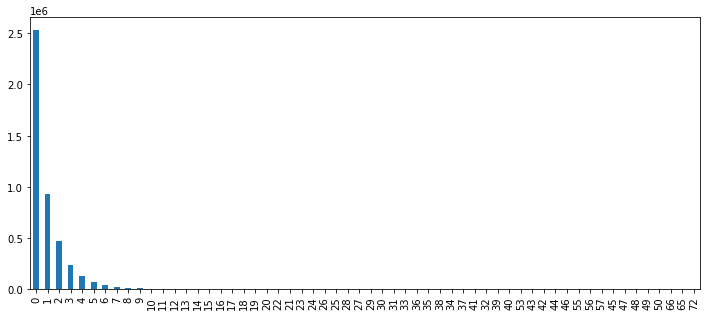

In [ ]:
#Now let's look at the number of kills.

z = data.kills.value_counts()
z
plt.figure(figsize=(12,5))
z.plot.bar()
plt.show()


- most of the players didn't kill anybody 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


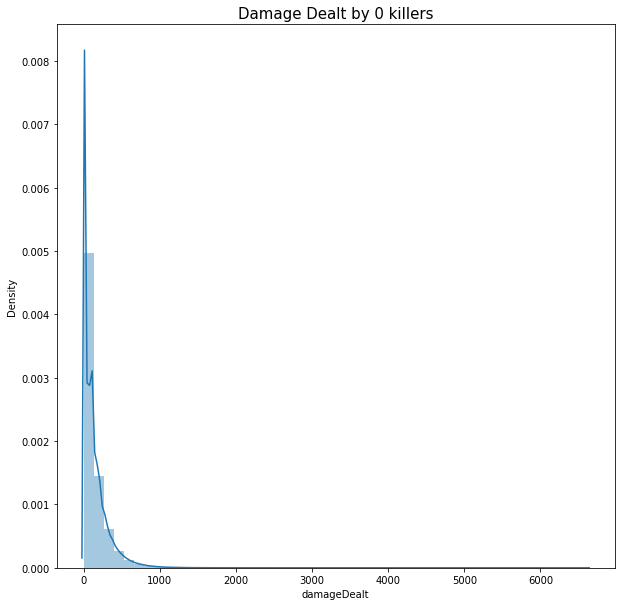

In [ ]:
no_damage = data.copy()
no_damage = no_damage[no_damage['kills']==0]
plt.figure(figsize=(10,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sb.distplot(data['damageDealt'])
plt.show()

Here most of the players not done any damage

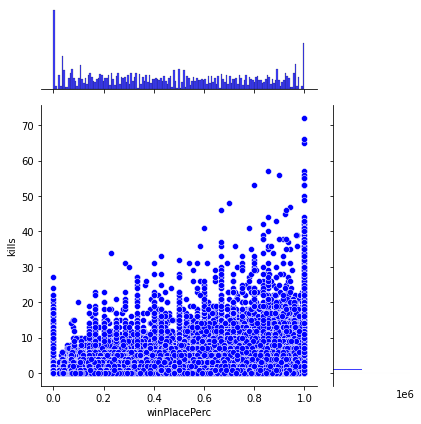

In [ ]:
#Let us plot the relation between win percentage and kills.
sb.jointplot(x='winPlacePerc', y='kills', data=data, ratio=3, color='b')
plt.show()

- killing has correlation with winning so grouping based on number of kills by the players 

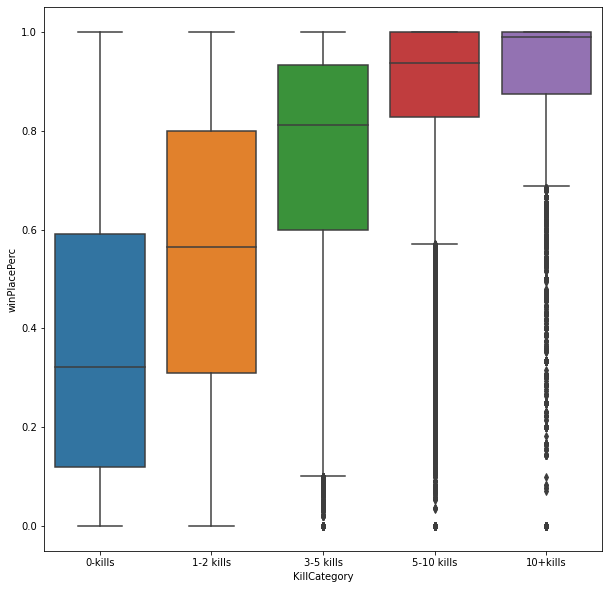

In [ ]:
kills = data.copy()
kills['KillCategory'] = pd.cut(kills['kills'],[-1,0,2,5,10,60],labels=['0-kills','1-2 kills','3-5 kills','5-10 kills','10+kills'])
plt.figure(figsize=(10,10))
sb.boxplot(x='KillCategory',y='winPlacePerc',data=kills)
plt.show()

In [ ]:
data[data['winPlacePerc'].isnull()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [ ]:
  data.corrwith(data.winPlacePerc)

assists            0.299441
boosts             0.634234
damageDealt        0.440507
DBNOs              0.279970
headshotKills      0.277722
heals              0.427857
killPlace         -0.719069
killPoints         0.012908
kills              0.419916
killStreaks        0.377566
longestKill        0.410154
matchDuration     -0.005171
maxPlace           0.037377
numGroups          0.039621
rankPoints         0.013523
revives            0.240881
rideDistance       0.342915
roadKills          0.034544
swimDistance       0.149607
teamKills          0.015943
vehicleDestroys    0.073436
walkDistance       0.810888
weaponsAcquired    0.583806
winPoints          0.007061
winPlacePerc       1.000000
dtype: float64

In [ ]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
# dropping ID column as not required
data.drop(columns=['Id'],axis=1,inplace=True)

In [ ]:
data

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
#dropping groupid
data.drop(columns=['groupId'],axis=1,inplace=True)
data

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
#dropping matchid
data.drop(columns=['matchId'],axis=1,inplace=True)
data

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [ ]:
# Encoding the match type feature
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data.matchType = enc.fit_transform(data.matchType)
data.matchType.unique()

array([15,  2, 13, 14,  3, 12, 11,  0,  5,  9,  4,  7,  6, 10,  1,  8])

# Data Splitting as Train and test

In [ ]:
# Importing necessary package for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
# splitting up of data
X = data.iloc[ : , :-1]
y = data.iloc[ : ,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02,random_state=10)

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.8298906327540301
0.09199167267556764
0.01607835328905004


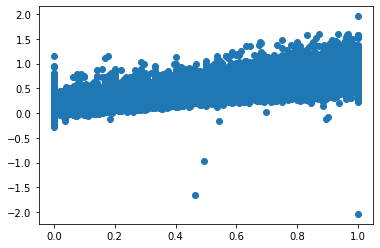

In [ ]:
plt.scatter(y_test,y_predict)

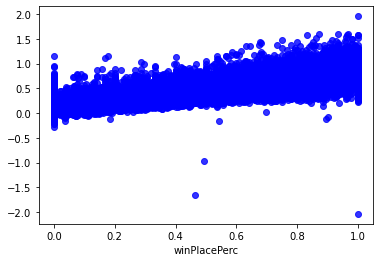

In [ ]:
sb.regplot(x=y_test,y=y_predict,color='b',scatter=True)

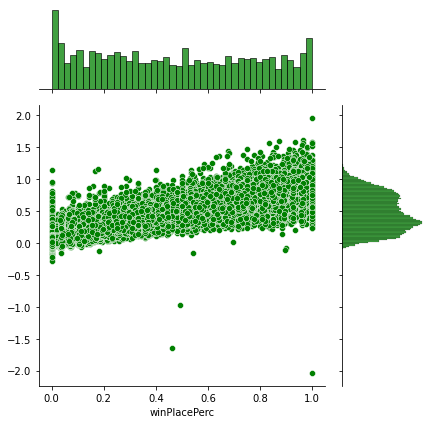

In [ ]:
#jointplot : Combine regplot and JointGrid (when used with kind="reg")
sb.jointplot(x=y_test, y=y_predict, data=y_test, ratio=3, color='g')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


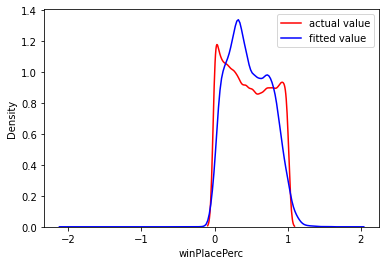

In [ ]:
ax1=sb.distplot(y_test,hist=False,color='red',label="actual value")
sb.distplot(y_predict,hist=False,color='b',label="fitted value")
plt.legend(loc='upper right')

In [ ]:
# Training R2-Score
y_train_predict=model.predict(X_train)
train_score=r2_score(y_train,y_train_predict)
train_score

0.8318324273701007

In [ ]:
X_train.shape,X_test.shape

((4358025, 25), (88940, 25))

In [ ]:
## CHecking adjusted r2 score for train
train_adjusted_r2 = 1-(1-0.8318)*(4358025-1)/(4358025-25-1)
train_adjusted_r2

0.8317990351076262

In [ ]:
## CHecking adjusted r2 score for test
test_adjusted_r2= 1-(1-0.8298)*(88940-1)/(88940-25-1)
test_adjusted_r2

0.8297521447691028

# XG Boost

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))


[06:30:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:30:29] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
0.8974673246984549
0.06966312066854667
0.009691156953079271


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


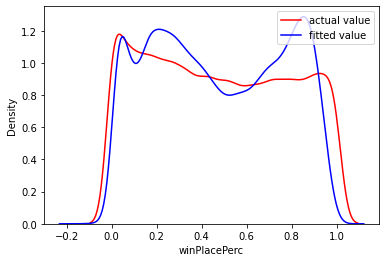

In [ ]:
ax1=sb.distplot(y_test,hist=False,color='red',label="actual value")
sb.distplot(y_predict,hist=False,color='b',label="fitted value")
plt.legend(loc='upper right')

In [ ]:
# Training R2-Score
y_train_predict=model.predict(X_train)
train_score=r2_score(y_train,y_train_predict)
train_score

0.8971856421341208

In [ ]:
X_train.shape,X_test.shape

((4358025, 25), (88940, 25))

In [ ]:
## CHecking adjusted r2 score for train
train_adjusted_r2 = 1-(1-0.8971)*(4358025-1)/(4358025-25-1)
print('adjusted r2_train : ',train_adjusted_r2)
## CHecking adjusted r2 score for test
test_adjusted_r2= 1-(1-0.8974)*(88940-1)/(88940-25-1)
print('adjusted r2_test : ', test_adjusted_r2)

adjusted r2_train :  0.8970994097061519
adjusted r2_test :  0.8973711518995884


# Artifical Neural Network ( ANN )

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.8785326137233063
0.07718946888586374
0.011480823080308403


In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100,50,30))
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(r2_score(y_test,y_predict))
print(mean_absolute_error(y_test,y_predict))
print(mean_squared_error(y_test,y_predict))

0.916346340829238
0.06371832083561652
0.007906754976781897


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


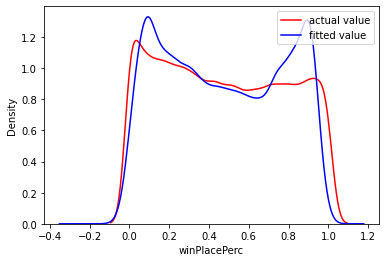

In [ ]:
ax1=sb.distplot(y_test,hist=False,color='red',label="actual value")
sb.distplot(y_predict,hist=False,color='b',label="fitted value")
plt.legend(loc='upper right')

In [ ]:
## CHecking adjusted r2 score for test
test_adjusted_r2= 1-(1-0.9163)*(88940-1)/(88940-25-1)
print('adjusted r2_test : ',test_adjusted_r2)

adjusted r2_test :  0.9162764660233484


# CNN with Tensorflow

In [1]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
# Data Modeling
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape = [25], activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')  
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
model.summary()
model.fit(X_train, y_train, epochs=10)

NameError: ignored

In [ ]:
# Data Validation

train_predict = model.predict(X_train)
train_msq = mean_squared_error(y_train, train_predict)
train_r2 = r2_score(y_train, train_predict)
print("Train:\nMean Squared Error :", train_msq, "\nR2 score :", train_r2)

test_predict = model.predict(X_test) 
test_msq = mean_squared_error(y_test, test_predict) 
test_r2 = r2_score(y_test, test_predict) 
print("\nTest:\nMean Squared Error :", test_msq, "\nR2 score :", test_r2)

In [ ]:
## CHecking adjusted r2 score for train
train_adjusted_r2 = 1-(1-0.92)*(4358025-1)/(4358025-25-1)
print('adjusted r2_train : ',train_adjusted_r2)
## CHecking adjusted r2 score for test
test_adjusted_r2= 1-(1-0.92)*(88940-1)/(88940-25-1)
print('adjusted r2_test : ',test_adjusted_r2)

In [ ]:
ax1=sb.distplot(y_test,hist=False,color='red',label="actual value")
sb.distplot(test_predict,hist=False,color='b',label="fitted value")
plt.legend(loc='upper right')